In [1]:
from toolbox import ToolBox
from tqdm import tqdm

from models import *

tqdm.pandas()

In [158]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import math
import matplotlib.pyplot as plt

In [2]:
tb = ToolBox()

In [113]:
df = tb.load_data_sql(table='user_reviews', where="lang = 'en'", use_cache=True)
df = df[~df['review'].isnull()]
df.head()

Loaded from cache


,game,username,date,grade,review,lang,helpful_nb,helpful_nb_total
0,007-legends-pc,Bughyman1000,2013-01-19,30,"Oh, my dear God! What is it with developers th...",en,0,0
1,007-legends-pc,DiabloZiri,2014-06-23,30,Seriously if you want to have a HUGE laugh wit...,en,0,0
2,007-legends-pc,DrugsMeazureTim,2014-12-11,0,godawful port of the xbox 360 version and ps3....,en,0,0
3,007-legends-pc,DustEater,2012-11-03,0,Agree. Worst game ever. Its a full copy of Cal...,en,8,8
4,007-legends-pc,evry1isacritic,2012-11-04,0,DO NOT BUY THIS GAME for the PC (or for any ot...,en,2,2


In [114]:
df.set_index('game', inplace=True)
df.head()

,username,date,grade,review,lang,helpful_nb,helpful_nb_total
game,,,,,,,
007-legends-pc,Bughyman1000,2013-01-19,30,"Oh, my dear God! What is it with developers th...",en,0,0
007-legends-pc,DiabloZiri,2014-06-23,30,Seriously if you want to have a HUGE laugh wit...,en,0,0
007-legends-pc,DrugsMeazureTim,2014-12-11,0,godawful port of the xbox 360 version and ps3....,en,0,0
007-legends-pc,DustEater,2012-11-03,0,Agree. Worst game ever. Its a full copy of Cal...,en,8,8
007-legends-pc,evry1isacritic,2012-11-04,0,DO NOT BUY THIS GAME for the PC (or for any ot...,en,2,2


In [131]:
min_dates = pd.DataFrame(df.groupby('game')['date'].min())
min_dates.rename(columns={'date':'release_date'}, inplace=True)

In [133]:
df = pd.merge(df, min_dates, left_index=True, right_index=True)
df.head()

,username,date,grade,review,lang,helpful_nb,helpful_nb_total,release_date
game,,,,,,,,
007-legends-pc,Bughyman1000,2013-01-19,30,"Oh, my dear God! What is it with developers th...",en,0,0,2012-11-03
007-legends-pc,DiabloZiri,2014-06-23,30,Seriously if you want to have a HUGE laugh wit...,en,0,0,2012-11-03
007-legends-pc,DrugsMeazureTim,2014-12-11,0,godawful port of the xbox 360 version and ps3....,en,0,0,2012-11-03
007-legends-pc,DustEater,2012-11-03,0,Agree. Worst game ever. Its a full copy of Cal...,en,8,8,2012-11-03
007-legends-pc,evry1isacritic,2012-11-04,0,DO NOT BUY THIS GAME for the PC (or for any ot...,en,2,2,2012-11-03


In [152]:
def difference_weeks(date, release_date):
    date_dif=date-release_date
    weeks = math.floor(date_dif/np.timedelta64(1,'W'))
    return weeks

In [153]:
difference_weeks(df.iloc[0, 1], df.iloc[0, 7])

11

In [156]:
df['week'] = df.apply(lambda row: difference_weeks(row['date'], row['release_date']), axis=1)

In [157]:
df.head()

,username,date,grade,review,lang,helpful_nb,helpful_nb_total,release_date,week
game,,,,,,,,,
007-legends-pc,Bughyman1000,2013-01-19,30,"Oh, my dear God! What is it with developers th...",en,0,0,2012-11-03,11
007-legends-pc,DiabloZiri,2014-06-23,30,Seriously if you want to have a HUGE laugh wit...,en,0,0,2012-11-03,85
007-legends-pc,DrugsMeazureTim,2014-12-11,0,godawful port of the xbox 360 version and ps3....,en,0,0,2012-11-03,109
007-legends-pc,DustEater,2012-11-03,0,Agree. Worst game ever. Its a full copy of Cal...,en,8,8,2012-11-03,0
007-legends-pc,evry1isacritic,2012-11-04,0,DO NOT BUY THIS GAME for the PC (or for any ot...,en,2,2,2012-11-03,0


In [204]:
df_grouped = df.groupby([df.index, 'week'], as_index=False).count()
df_grouped.head()

,week,username,date,grade,review,lang,helpful_nb,helpful_nb_total,release_date
0,0,6,6,6,6,6,6,6,6
1,1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,1,1
3,6,1,1,1,1,1,1,1,1
4,11,1,1,1,1,1,1,1,1


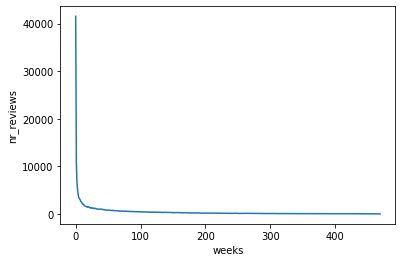

In [196]:
plt.plot(df.groupby('week', as_index=False).count()['week'], df.groupby('week', as_index=False).count()['username'])
plt.xlabel('weeks')
plt.ylabel('nr_reviews')
plt.show()

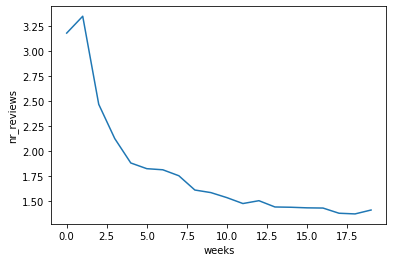

In [214]:
plt.plot(df_grouped.groupby('week', as_index=False).mean()['week'][:20], df_grouped.groupby('week', as_index=False).mean()['username'][:20])
plt.xlabel('weeks')
plt.ylabel('nr_reviews')
plt.show()

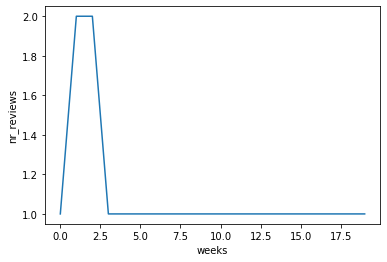

In [215]:
plt.plot(df_grouped.groupby('week', as_index=False).median()['week'][:20], df_grouped.groupby('week', as_index=False).median()['username'][:20])
plt.xlabel('weeks')
plt.ylabel('nr_reviews')
plt.show()